
### Confronto tra output dei Baselines Methods e la Gold combinata

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, precision_score

#### Importo il csv degli output dei Baseline

In [2]:
# df = pd.read_csv("main_baseline__methods_ver2.csv", sep=";")
df = pd.read_csv("main_baseline__methods_v3.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118680 entries, 0 to 118679
Data columns (total 12 columns):
lemma1    118680 non-null object
lemma2    118680 non-null object
bid       118680 non-null int64
cap       118680 non-null int64
m1        118680 non-null int64
m2        118680 non-null int64
m2_a      118680 non-null int64
m3        118680 non-null float64
m4        0 non-null float64
m4_a      0 non-null float64
m4_b      0 non-null float64
m5        118680 non-null float64
dtypes: float64(5), int64(5), object(2)
memory usage: 10.9+ MB


In [3]:
df.head()

,lemma1,lemma2,bid,cap,m1,m2,m2_a,m3,m4,m4_a,m4_b,m5
0,malicious software,grid compute,1,4,0,0,0,0.005479,NaN,NaN,NaN,3.000000
1,malicious software,forwarding table,1,4,0,0,0,0.029773,NaN,NaN,NaN,0.800000
2,malicious software,transmission control protocol/internet protoco...,1,4,0,0,0,0.007305,NaN,NaN,NaN,0.000000
3,malicious software,phone technology,1,4,0,0,0,-0.024576,NaN,NaN,NaN,2.500000
4,malicious software,hop count,1,4,0,0,0,-0.040389,NaN,NaN,NaN,-0.666667


#### Trasformo la colonna m3 da object a float

In [88]:
# df['m3'] = df['m3'].str.replace(',',".").astype(float)

In [89]:
# df['m5'] = df['m5'].str.replace(',',".").astype(float)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118680 entries, 0 to 118679
Data columns (total 12 columns):
lemma1    118680 non-null object
lemma2    118680 non-null object
bid       118680 non-null int64
cap       118680 non-null int64
m1        118680 non-null int64
m2        118680 non-null int64
m2_a      118680 non-null int64
m3        118680 non-null float64
m4        0 non-null float64
m4_a      0 non-null float64
m4_b      0 non-null float64
m5        118680 non-null float64
dtypes: float64(5), int64(5), object(2)
memory usage: 10.9+ MB


#### Creo una colonna nuova "comb" che è la combinazione del lemma2+lemma1

In [91]:
# df["new"] = df["lemma1"] +","+ df["lemma2"]
df["comb"] = df["lemma2"] +"$"+ df["lemma1"]

In [92]:
df.head(10)

,lemma1,lemma2,bid,cap,m1,m2,m2_a,m3,m4,m4_a,m4_b,m5,comb
0,malicious software,grid compute,1,4,0,0,0,0.005479,NaN,NaN,NaN,3.000000,grid compute$malicious software
1,malicious software,forwarding table,1,4,0,0,0,0.029773,NaN,NaN,NaN,0.800000,forwarding table$malicious software
2,malicious software,transmission control protocol/internet protoco...,1,4,0,0,0,0.007305,NaN,NaN,NaN,0.000000,transmission control protocol/internet protoco...
3,malicious software,phone technology,1,4,0,0,0,-0.024576,NaN,NaN,NaN,2.500000,phone technology$malicious software
4,malicious software,hop count,1,4,0,0,0,-0.040389,NaN,NaN,NaN,-0.666667,hop count$malicious software
5,malicious software,internet protocol version four,1,4,0,0,0,-0.061239,NaN,NaN,NaN,1.750000,internet protocol version four$malicious software
6,malicious software,anticybersquatting consumer protection act,1,4,0,0,0,0.000000,NaN,NaN,NaN,-2.000000,anticybersquatting consumer protection act$mal...
7,malicious software,connectionless protocol,1,4,0,0,0,-0.043624,NaN,NaN,NaN,0.000000,connectionless protocol$malicious software
8,malicious software,port number,1,4,0,0,0,0.028619,NaN,NaN,NaN,0.400000,port number$malicious software
9,malicious software,encoded information,1,4,0,0,0,0.030150,NaN,NaN,NaN,2.000000,encoded information$malicious software


#### Importo il csv della Gold combinata

In [93]:
df2 = pd.read_csv("gold_combinata.csv", sep=";", error_bad_lines=False)

#### Creo una colonna nuova "comb" che è la combinazione del lemma di prerequisito + lemma advanced (per creare coppie lemmi come nella colonna "new" da confrontare)

In [94]:
df2["comb"] = df2["prerequisite"] +"$"+ df2["advanced"]

#### Rendo la colonna "comb" in lower case e la ripulisco

In [95]:
df2['comb']= df2['comb'].str.lower().str.replace('s/+',"")
#df2.head(10000)
#df['new']
df2['comb']

0                           computer$computer system
1                                   computer$network
2                            computer system$network
3                           network$network software
4                          software$network software
5                      network$personal area network
6                         network$local area network
7                  network$metropolitan area network
8                          network$wide area network
9                     computer$personal area network
10                       computer$local area network
11                computer$metropolitan area network
12                        computer$wide area network
13                         machine$wide area network
14                              network$open network
15                                  network$internet
16                             open network$internet
17                              open system$internet
18                                       netwo

#### Utilizzo "isin" per confrontare i valori della colonna "comb" con quelli della gold =>

In [96]:
# if (df['comb'].isin(df2['comb']).value_counts() #Il numero totale di coppie combacianti resta invariato perchè nel file dei baseline methods abbiamo per ogni coppia anche il suo inverso.
condivisi=df['comb'].isin(df2['comb'])
condivisi.value_counts()
#pd.merge(df, df2,how='inner', on='comb')

False    117661
True       1019
Name: comb, dtype: int64

In [97]:
import matplotlib.pyplot as plt

In [98]:
objects = ('False', 'True')
y_pos = np.arange(len(objects))
# performance = [119044,1018]
performance = [117661,1019]

Text(0.5, 1.0, 'Confronto Baselines Methods con Gold')

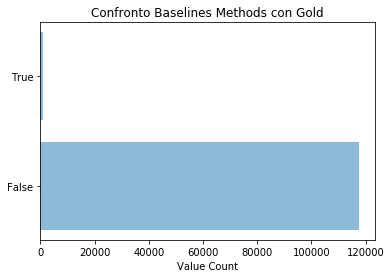

In [99]:
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Value Count')
plt.title('Confronto Baselines Methods con Gold')

### Subsets 

#### Subset 1: coppie di termini con valore 1 per il metodo m1 (Iponimi/Meronimi)

In [100]:
subset1 = df[df['m1']==1]
subset1


,lemma1,lemma2,bid,cap,m1,m2,m2_a,m3,m4,m4_a,m4_b,m5,comb
6849,swarm,cloud,1,4,1,1,0,0.000000,NaN,NaN,NaN,0.000000,cloud$swarm
8619,streaming,swarm,1,4,1,1,0,-0.070879,NaN,NaN,NaN,1.000000,swarm$streaming
8699,streaming,process,1,4,1,1,0,-0.087676,NaN,NaN,NaN,1.000000,process$streaming
9471,anchor,device,1,4,1,1,0,0.000000,NaN,NaN,NaN,1.500000,device$anchor
9709,host,computer,1,4,1,1,0,0.000000,NaN,NaN,NaN,2.200000,computer$host
9751,host,machine,1,4,1,1,0,-0.130567,NaN,NaN,NaN,2.200000,machine$host
9797,host,server,1,4,1,1,0,0.000000,NaN,NaN,NaN,2.200000,server$host
9815,host,device,1,4,1,1,0,0.000000,NaN,NaN,NaN,2.666667,device$host
9866,host,service,1,4,1,1,0,-0.075900,NaN,NaN,NaN,2.200000,service$host
10159,repeater,device,1,4,1,1,0,0.011458,NaN,NaN,NaN,0.000000,device$repeater


In [101]:
subset1['comb'].isin(df2['comb']).value_counts()
# pd.merge(subset1, df2,how='inner', on='comb')

False    110
True      22
Name: comb, dtype: int64

#### Subset 2: coppie di termini con valore 0 per il metodo m1 (Iponimi/Meronimi)

In [102]:
subset2 = df[df['m1']==0]

In [103]:
subset2['comb'].isin(df2['comb']).value_counts()

False    117551
True        997
Name: comb, dtype: int64

#### Subset 3: coppie di termini con valore 1 per il metodo m2 (Lexical Patterns)

In [104]:
subset3 = df[df['m2']==1]


In [105]:
subset3['comb'].isin(df2['comb']).value_counts()

False    113
True      25
Name: comb, dtype: int64

#### Subset 4: coppie di termini con valore 0 per il metodo m2 (Lexical Patterns)


In [106]:
subset4 = df[df['m2']==0]

In [107]:
subset4['comb'].isin(df2['comb']).value_counts()

False    117548
True        994
Name: comb, dtype: int64

#### Subset 5: coppie di termini con valore NEGATIVO per il metodo m3 (RefD)


In [108]:
subset5 = df[df['m3']<0]

In [109]:
subset5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 3 to 118679
Data columns (total 13 columns):
lemma1    26028 non-null object
lemma2    26028 non-null object
bid       26028 non-null int64
cap       26028 non-null int64
m1        26028 non-null int64
m2        26028 non-null int64
m2_a      26028 non-null int64
m3        26028 non-null float64
m4        0 non-null float64
m4_a      0 non-null float64
m4_b      0 non-null float64
m5        26028 non-null float64
comb      26028 non-null object
dtypes: float64(5), int64(5), object(3)
memory usage: 2.8+ MB


In [110]:
subset5['comb'].isin(df2['comb']).value_counts()

False    25788
True       240
Name: comb, dtype: int64

Text(0.5, 1.0, 'Confronto M3 RefD Negativo con Gold')

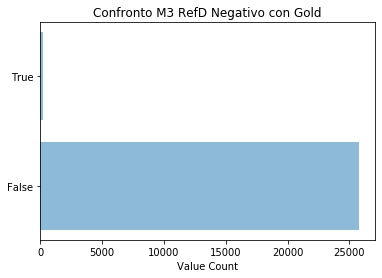

In [111]:
objects = ('False', 'True')
y_pos = np.arange(len(objects))
# performance = [22901,358]
performance = [25788, 240]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Value Count')
plt.title('Confronto M3 RefD Negativo con Gold')


#### Subset 6: coppie di termini con valore POSITIVO diverso da 0 per il metodo m3 (RefD)

In [112]:
subset6 = df[df['m3']>0]

In [113]:
subset6['comb'].isin(df2['comb']).value_counts()

False    25791
True       237
Name: comb, dtype: int64

Text(0.5, 1.0, 'Confronto M3 RefD Positivo con Gold')

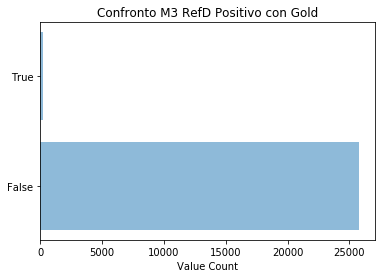

In [114]:
objects = ('False', 'True')
y_pos = np.arange(len(objects))
# performance = [23063,196]
performance = [25791,237]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Value Count')
plt.title('Confronto M3 RefD Positivo con Gold')


#### Subset 7: coppie di termini con valore 0 per il metodo m3 (RefD)

In [115]:
subset7 = df[df['m3']==0]

In [116]:
subset7['comb'].isin(df2['comb']).value_counts()

False    66082
True       542
Name: comb, dtype: int64

Text(0.5, 1.0, 'Confronto M3 RefD == 0 con Gold')

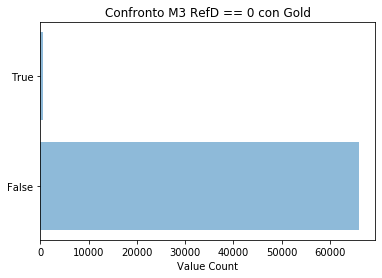

In [117]:
# Se refD == 0 potrebbe dire che uno dei due concetti coinvolti non hanno una pagina in wikipedia

objects = ('False', 'True')
y_pos = np.arange(len(objects))
# performance = [73080,464]
performance = [66082,542]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Value Count')
plt.title('Confronto M3 RefD == 0 con Gold')

#### Analisi quantitative per il metodo TOC Distance

In [118]:
# subset8 = df[df['m5']==0]

In [119]:
#subset8['comb'].isin(df2['comb']).value_counts()

In [120]:
subset9 = df[df['m5']>0]

In [121]:
subset9['comb'].isin(df2['comb']).value_counts()

False    60503
True       715
Name: comb, dtype: int64

In [122]:
subset10 = df[df['m5']<0]

In [123]:
subset10['comb'].isin(df2['comb']).value_counts()

False    28656
True        34
Name: comb, dtype: int64

In [124]:
subset11 = df[df['m5']==0]

In [125]:
subset11['comb'].isin(df2['comb']).value_counts()

False    28502
True       270
Name: comb, dtype: int64

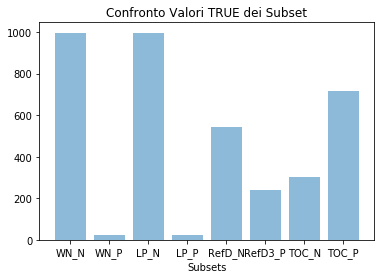

In [126]:
objects = ('WN_N', 'WN_P', 'LP_N', 'LP_P', 'RefD_N', 'RefD3_P','TOC_N', 'TOC_P')
# WN = lex patt wordnet, LP = lex patt, RefD, TOC distance, invece Topic modeling manca
# objects = ('M1_Neg', 'M1_Pos', 'M2_Neg', 'M2_Pos', 'M3_Neg', 'M3_Pos','M5_Neg', 'M5_Pos')
y_pos = np.arange(len(objects))
# performance = [1017,1,1017,1,358,196,464]
performance = [997,22,994,25,542,242,304,715]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Subsets')
plt.title('Confronto Valori TRUE dei Subset')

plt.show()

### Precision Recall
precision = true positive / true positive + false positive
recall = true positive/ trye positive + false negative

In [127]:
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
precision_recall_fscore_support(y_true, y_pred)


(array([0.66666667, 1.        ]),
 array([1. , 0.5]),
 array([0.8       , 0.66666667]),
 array([2, 2]))